In [ ]:
!pip install tensorflow

Installing releveant libraries like Pillow(image pixel reset) and tensorflow(for building cnn model)

In [ ]:
!pip install Pillow

Importing images from my google drive folder containng images dataset with filenames as (i-th segment of 30min ecg_data)_(patient_number)_(which class it belongs to among 5 classes).png

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

input_dir = "/content/drive/My Drive/Colab Notebooks/ecg_data_sub"
arr = ["N.png","R.png","V.png","L.png","A.png"]
diff = [0,0,0,0,0]
for filename1 in os.listdir(input_dir):
  for filename2 in os.listdir(os.path.join(input_dir,filename1)):
    p = filename2.split("_")
    diff[arr.index(p[2])]+=1
print(diff)

Using PIL library to change pixels of image and grayscaling it and then load it as numpy array of 150 X 224 size.

In [ ]:

from PIL import Image
import os
import numpy as np

input_dir = "/content/drive/My Drive/Colab Notebooks/ecg_data_sub"

target_size = (224,150)
images = []
labels = []
cnt = 0
for filename1 in os.listdir(input_dir):
  for filename2 in os.listdir(os.path.join(input_dir,filename1)):
    cnt+=1
    if cnt%1000==0:
        print(cnt)
    p = filename2.split("_")
    labels.append(p[2])
    img = Image.open(os.path.join(os.path.join(input_dir,filename1), filename2)).convert('L')
    img = img.resize(target_size)
    img_arr = np.asarray(img) / 255.0
    img_arr = img_arr.reshape(150,224,1)
    # print(img_arr.shape)
    images.append(img_arr)
images = np.array(images)
print(len(images))
print(images.shape)

Just verifying that images array has built with optimum pixels or not by plotting a ecg image using Matplotlib 

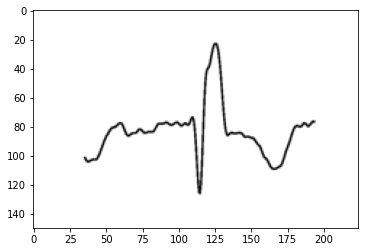

In [ ]:
import matplotlib.pyplot as plt
arr = images[0].reshape(150,224)
plt.imshow(arr,cmap='gray')
plt.show()

Converting Labels array as 1X5 numpy array with the index as class number for feeding in our cnn model

In [ ]:
from collections import Counter
dic = Counter(labels)
print(dic)
out_class = ["N.png","R.png","V.png","L.png","A.png"]
for i in range(len(labels)):
    labels[i] = out_class.index(labels[i])
    g = [0,0,0,0,0]
    g[labels[i]] = 1
    labels[i] = g
labels = np.array(labels)
print(labels[0])

Splitting data into training and testing part using sklearn library

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images,labels,random_state=0)
print(len(x_train),len(x_test))
print(x_train.shape,y_train.shape)
img_size = images[0].shape
print(img_size)

Building architecture of CNN model using Keras Library

In [ ]:
from keras.models import Sequential
import keras
from keras.layers import Conv2D,BatchNormalization,MaxPool2D,Flatten,Dense,Dropout

model = Sequential()
model.add(Conv2D(64, (3,3),strides = (1,1), input_shape = img_size,kernel_initializer='glorot_uniform'))
model.add(keras.layers.ELU())
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))
model.add(keras.layers.ELU())
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))
model.add(Conv2D(128, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))
model.add(keras.layers.ELU())
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))
model.add(keras.layers.ELU())
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))
model.add(Conv2D(256, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))
model.add(keras.layers.ELU())
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))
model.add(keras.layers.ELU())
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))
model.add(Flatten())
model.add(Dense(2048))
model.add(keras.layers.ELU())
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Fitting our training data into Cnn model to optimise weights(which has initially started randomly)

In [ ]:
model.fit(x_train,y_train,epochs=15,batch_size=50,validation_data = (x_test,y_test))

Using gc library to lower down System RAM so that it will not crash.

In [ ]:
import gc
gc.collect()

import time
for i in range(1000):
  time.sleep(1)
  gc.collect()

Saving my model as my_model.h5 in my google drive for further use.

In [ ]:
from keras.models import load_model

# Save the model and weights
model.save('/content/drive/My Drive/Colab Notebooks/my_model.h5')
